# TfidfVectorizer

In [10]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns
import lightgbm as lgb


pd.set_option('display.max_colwidth', None)

df = pd.read_csv('../../Data-Preperation/preprocessed_dataset.csv')

df['Text'] = df['Text'].str.lower()

## ohne Stopwords

In [2]:
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(df['Text'])
y = df['target']

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [4]:
model = lgb.LGBMClassifier()
model.fit(X_train, y_train)

[LightGBM] [Info] Number of positive: 639494, number of negative: 640506
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 46.082198 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 327481
[LightGBM] [Info] Number of data points in the train set: 1280000, number of used features: 27376
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.499605 -> initscore=-0.001581
[LightGBM] [Info] Start training from score -0.001581


LGBMClassifier()

In [5]:
y_pred_lgbm = model.predict(X_test)

<Axes: >

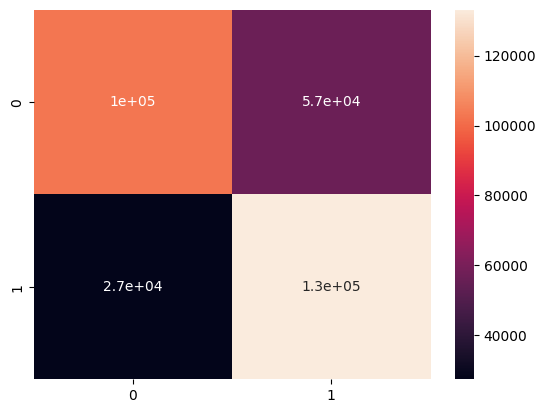

In [12]:
cm_lgbm = confusion_matrix(y_test, y_pred_lgbm)
sns.heatmap(cm_lgbm, annot=True)

In [13]:
print(f'Accuracy: {accuracy_score(y_test, y_pred_lgbm):.2f}')

Accuracy: 0.74


In [ ]:
# def clean_text(text):
#     text = re.sub(r'[@#]\w+', ' ', text)  # Entfernen von Hashtags und 
#     text = re.sub(r'https?://\S+', ' ', text)  # Entfernen von Links
#     text = re.sub(r"\b\w+['’]\w+\b", ' ', text)  # Entfernen von Kontraktionen wie 's, 'm etc. 
#     words = text.split()  
#     words = [word for word in words if word.lower() not in stop_words]  
#     return ' '.join(words)
# df['Text'] = df['Text'].apply(clean_text)

# sentence-transformers

In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
import lightgbm as lgb

from sentence_transformers import SentenceTransformer, util
model = SentenceTransformer('all-mpnet-base-v2')

pd.set_option('display.max_colwidth', None)

df = pd.read_csv('../../Data-Preperation/preprocessed_dataset.csv')

df['Text'] = df['Text'].str.lower()

/Users/I569423/Library/CloudStorage/OneDrive-Personal/DHBW/4.Semester/DataExploration/Data-Exploration/venv/lib/python3.12/site-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


In [7]:
embeddings_findings = model.encode(text, convert_to_tensor=True)

KeyboardInterrupt: 

In [ ]:
embeddings_findings = np.array(embeddings_findings)